<a href="https://colab.research.google.com/github/jassynavarro/CCDEPLRL_EXERCISES_COM221_ML/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [200]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [201]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [202]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


## 1. Tokenize the data

In [203]:
# answer here
review = dataset['review'].tolist()
rating = dataset['rating'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(review) * 0.8)

training_review = review[0:training_size]
testing_review = review[training_size:]
training_rating = rating[0:training_size]
testing_rating = rating[training_size:]

# Map ratings: 3-5 → 1 (positive), 1-2 → 0 (negative)
def map_rating_to_sentiment(rating_list):
    return [1 if int(r) > 3 else 0 for r in rating_list]

training_sentiment = map_rating_to_sentiment(training_rating)
testing_sentiment = map_rating_to_sentiment(testing_rating)

training_rating_final = np.array(training_sentiment)
testing_rating_final = np.array(testing_sentiment)

In [204]:
vocab_size = 1500
embedding_dim = 16
max_length = 22
trunc_type = 'post'
padding_type = 'post'
oov_tok = ""

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_review)

# (word -> integer ID)
word_index = tokenizer.word_index

## 2. Sequence the data

In [205]:
# answer here
training_sequences = tokenizer.texts_to_sequences(training_review)
testing_sequences = tokenizer.texts_to_sequences(testing_review)

## 3. Pad the data

In [206]:
# answer here
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## 4. Train a sentiment model

In [207]:
# answer here
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None, max_length)) # force build
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 22, 16)         │        24,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_15     │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,109 (94.18 KB)

 Trainable params: 24,109 (94.18 KB)

 Non-trainable params: 0 (0.00 B)

In [208]:
num_epochs = 40
history = model.fit(training_padded, training_rating_final, epochs=num_epochs, validation_data=(testing_padded, testing_rating_final))

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5160 - loss: 0.6933 - val_accuracy: 0.4726 - val_loss: 0.6934
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7709 - loss: 0.6877 - val_accuracy: 0.6418 - val_loss: 0.6871
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7684 - loss: 0.6798 - val_accuracy: 0.8159 - val_loss: 0.6720
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8019 - loss: 0.6669 - val_accuracy: 0.8408 - val_loss: 0.6473
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8124 - loss: 0.6489 - val_accuracy: 0.8408 - val_loss: 0.6338
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8091 - loss: 0.6316 - val_accuracy: 0.8308 - val_loss: 0.6059
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8352 - loss: 0.6112 - val_accuracy: 0.8507 - val_loss: 0.5671
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7925 - loss: 0.5878 - val_accuracy: 0.8408 - val_loss

In [209]:
# Predict and evaluate

predictions_prob = model.predict(testing_padded)
predictions = (predictions_prob > 0.5).astype(int)

print(classification_report(testing_rating_final, predictions, target_names=[f"Class {i}" for i in range(num_classes)]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
              precision    recall  f1-score   support

     Class 0       0.92      0.87      0.89       158
     Class 1       0.60      0.72      0.65        43

    accuracy                           0.84       201
   macro avg       0.76      0.79      0.77       201
weighted avg       0.85      0.84      0.84       201



## Get files for visualing the network

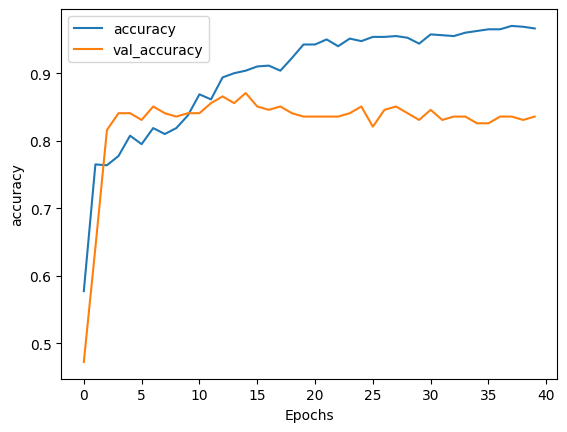

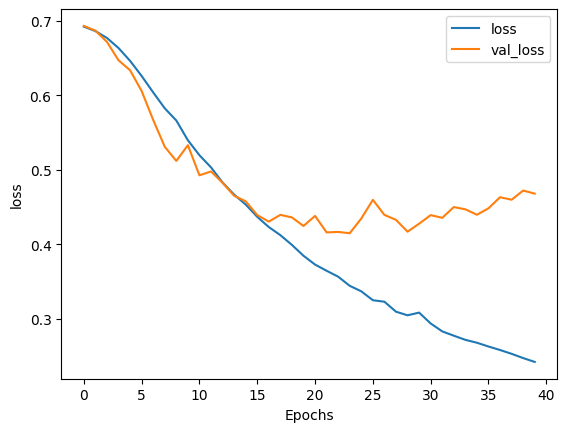

In [210]:
# answer here

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [211]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1500, 16)


In [212]:


print("Number of embeddings:", len(weights))       # Should be vocab_size
print("Number of words in metadata:", len(word_index))  # May be less than vocab_size



Number of embeddings: 1500
Number of words in metadata: 3131


## 5. Predict sentiment with new reviews

In [213]:
# answer here
# Example new reviews (Taglish style) for delivery of clothes/shoes
fake_reviews = ['I love this phone', 'I hate spaghetti',
                'Everything was cold',
                'Everything was hot exactly as I wanted',
                'Everything was green',
                'the host seated us immediately',
                'they gave us free chocolate cake',
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes',
                'does not work when I stand on my head',
                'panget ka',
                'maganda ka',
                'pangit yung dumating',
                'accurate sa kung ano yung nasa picture',
                'may free item pero di naman nagana',
                'same sa kung ano yung nasa picture',
                'mabait madaling mamatay']

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')


['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head', 'panget ka', 'maganda ka', 'pangit yung dumating', 'accurate sa kung ano yung nasa picture', 'may free item pero di naman nagana', 'same sa kung ano yung nasa picture', 'mabait madaling mamatay']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
I love this phone
[0.7075527]


I hate spaghetti
[0.21979155]


Everything was cold
[0.44122022]


Everything was hot exactly as I wanted
[0.59234595]


Everything was green
[0.4805022]


the host seated us immediately
[0.4560953]


they gave us free chocolate cake
[0.3126896]


not sure about the wilted flowers on the table
[0.03405644]


only works wh